# BUSINESS UNDERSTANDING

## PROBLEM STATEMENT

Customer churn significantly impacts revenue and customer lifetime value for internet service providers. Retaining existing customers is more cost-effective than acquiring new ones. However, identifying which customers are likely to churn remains a challenge.

> This project aims to develop a *predictive machine learning model* to estimate churn risk scores and identify high-risk customers using a mix of behavioral, demographic, and feedback data.

## OBJECTIVES

To build a supervised machine learning model capable of predicting customer churn risk for internet service providers using behavioral, transactional, and feedback data.

> *Goal*: Help companies identify customers at high risk of churning, enabling timely and targeted retention strategies.

This analysis will aim to answer the following business questions:

- Which *customer segments* are most likely to churn?
- What are the top *behavioral or demographic* predictors of churn?
- Can *sentiment in customer feedback* help predict churn risk?
- How effective are current *loyalty strategies* in retaining customers?
- What *actionable retention strategies* can we derive from high churn risk profiles?

## BUSINESS BENEFITS

### 1. Improved Customer Retention
- Early identification of likely-to-churn customers allows for *timely intervention*.

### 2. Cost Efficiency
- Reduced marketing spend on acquiring new customers by *retaining existing ones*.

### 3. Customer Lifetime Value (CLV) Optimization
- Retaining *high-value customers* increases CLV and long-term profitability.

### 4. Data-Driven Decision Making
- Marketing and customer success teams can rely on churn predictions and insights to *refine strategies*.

### 5. Product Improvement
- Insights from churn predictors and feedback sentiment can inform *service enhancements* and *innovation*.

##  SUCCESS CRITERIA

### Technical Success
- A cleaned, well-structured dataset ready for modeling.
- A classification model (baseline + advanced) achieving *≥ 70% accuracy*.
- Evaluation metrics showing *balanced performance,* with *recall prioritized*.

### Business Success
- Identification of *key churn drivers* for actionable insights.
- *Recommendations* for personalized customer retention strategies.

# DATA UNDERSTANDING

In [7]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load dataset from absolute path
df = pd.read_csv("customer_churn.csv")
#load the first 5 columns
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11/11/2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,12/9/2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


In [9]:
#Getting the shape of dataframe
df.shape

(36992, 23)

In [10]:
# Loading all columns that exist in our dataframe
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [11]:
#Data types in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [12]:
#Distribution of values in the dataframe
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


Standardizing the column names by converting them to lowercase and replacing spaces with underscores.


In [14]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Calculating percentages of null values on each column. This is to determine the best approach of dealing with the missing values

In [16]:
# Check for missing values
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

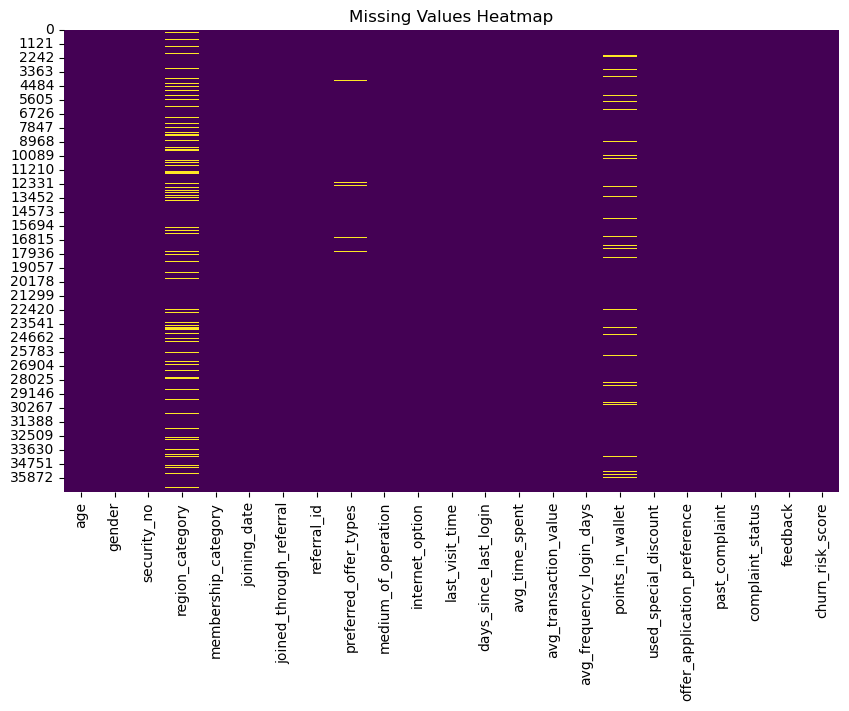

In [17]:
# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

This chart shows how customers are spread across different churn risk scores (0 = low risk, 1 = high risk). This helps us see if churn is a big concern.


In [19]:
# Calculate null values per column as a percentage
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print("Percentage of null values per column:")
print(null_percentage)

Percentage of null values per column:
age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
referral_id                      0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000

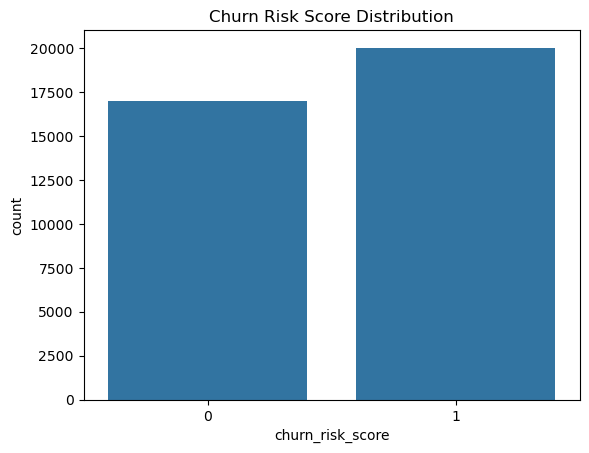

In [20]:
# Target distribution
sns.countplot(x='churn_risk_score', data=df)
plt.title("Churn Risk Score Distribution")
plt.show()

This heatmap shows how numerical features relate to each other. We can use it to see which features (like `tenure_days` or `feedback_sentiment`) are most connected to `churn_risk_score` when picking model inputs.

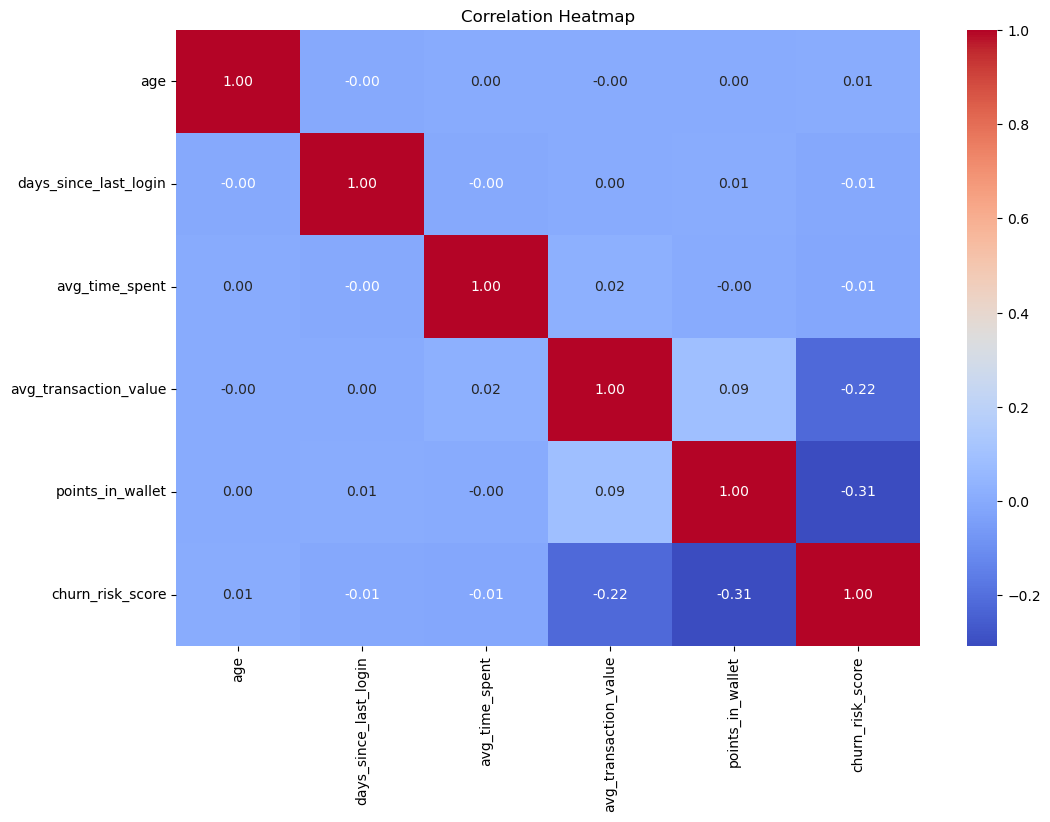

In [22]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

We observe that there is no strong correlation between the numerical variables

This plot shows how customer wallet points are spread out. It helps us understand if most customers have low, average, or high points.It is useful for identifying outliers or patterns that may affect churn.

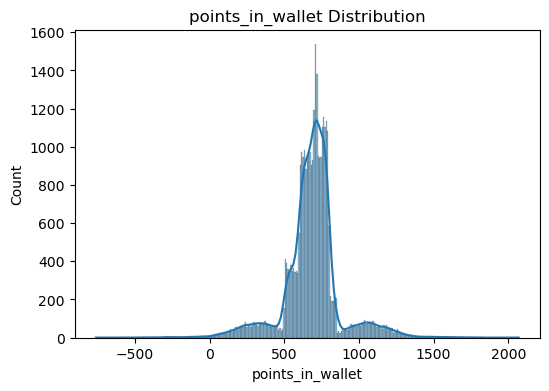

In [25]:
# Numerical distributions
for col in ['points_in_wallet']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

From the above graph, we can see that the distribution is uniform

The below graph shows membership category against churn risk score.

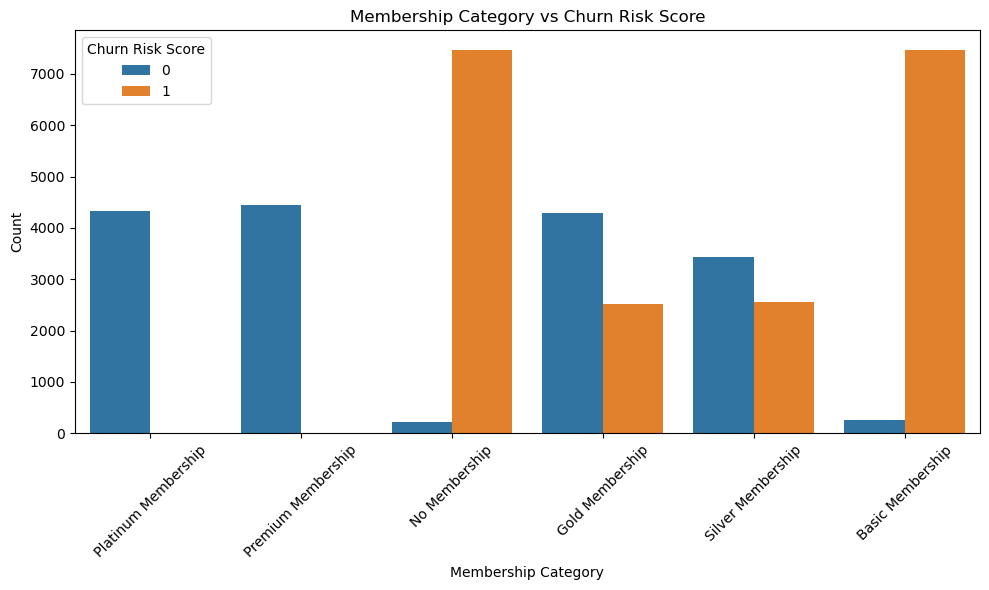

In [28]:
# Plot count of membership category vs churn risk score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='membership_category', hue='churn_risk_score')

# Visuals
plt.title("Membership Category vs Churn Risk Score")
plt.xlabel("Membership Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn Risk Score")
plt.tight_layout()
plt.show()

From the above graph we can see that people with basic membership have a high chance of leaving and as the category of membership grows the chance of churn reduces

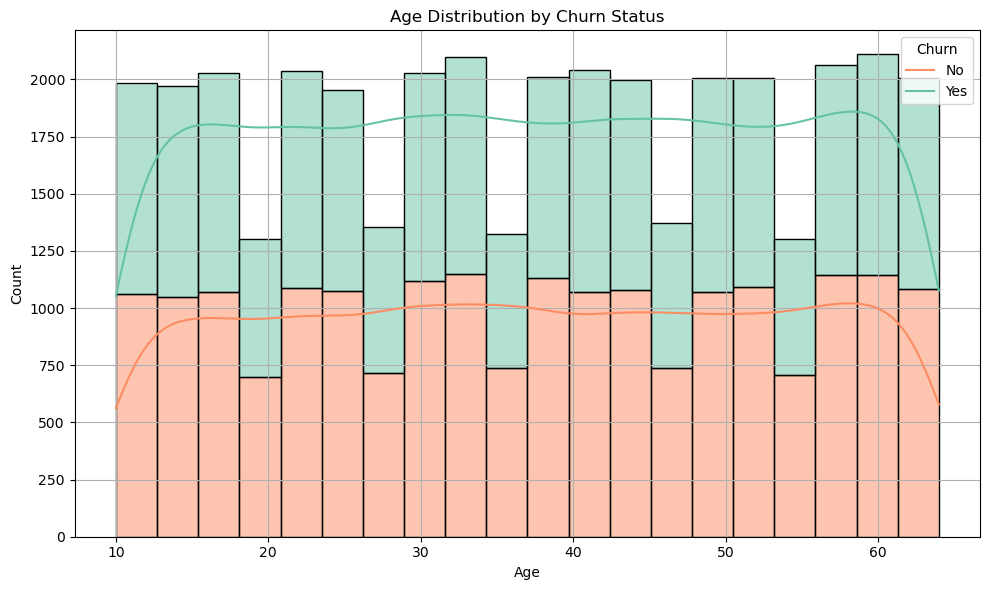

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='churn_risk_score', bins=20, kde=True, palette='Set2', multiple='stack')

plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()

The age distribution chart shows that customer churn is fairly uniform across all age groups, with no particular age range standing out as having significantly higher or lower churn rates. Both churned and non-churned customers are distributed evenly across the age spectrum, as indicated by the consistent height of the stacked bars and the overlapping KDE lines. This suggests that age is not a strong predictor of churn in this dataset, and other factors such as tenure, usage, or region may offermore meaningful insights into customer churn behavior.

We decided to drop the security number and ID columns since they did not offer any useful insightinto our analysis

In [33]:
df.drop(columns=['security_no', 'last_visit_time', 'referral_id'], inplace=True)
print(df.columns)

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


## DATA CLEANING

Starting with preferred_offer_types column we shall proceed to remove the null values. Since the percentage of null values in this column is 0.77% which is almost negligible, we will drop all the null rows.

In [35]:
# Drop rows where 'preferred_offer_types' is null
df_cleaned = df.dropna(subset=['preferred_offer_types'])

In [36]:
# Find the most frequent value (mode) of 'region_category'
mode_region = df_cleaned['region_category'].mode()[0]
print(f"The most frequent (mode) value in 'region_category' is: {mode_region}")

The most frequent (mode) value in 'region_category' is: Town


In [37]:
# Get distribution of 'region_category'
region_distribution = df_cleaned['region_category'].value_counts(dropna=False)

# Display the result
print("Distribution of values in 'region_category':")
print(region_distribution)

Distribution of values in 'region_category':
region_category
Town       14025
City       12635
NaN         5379
Village     4665
Name: count, dtype: int64


In [38]:
# Drop rows where 'region_category' is null
df_cleaned = df_cleaned.dropna(subset=['region_category'])

In [39]:
# Display the result
null_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(null_percentage_cleaned)

age                             0.000000
gender                          0.000000
region_category                 0.000000
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
preferred_offer_types           0.000000
medium_of_operation             0.000000
internet_option                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                9.423783
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score                0.000000
dtype: float64


In [40]:
# Get distribution of 'region_category'
points_in_wallet_distribution = df_cleaned['points_in_wallet'].value_counts(dropna=False)

# Display the result
print("Distribution of values in 'points_in_wallet':")
print(points_in_wallet_distribution)

Distribution of values in 'points_in_wallet':
points_in_wallet
NaN            2952
705.070000        9
771.750000        7
760.580000        6
715.420000        6
               ... 
1087.175701       1
810.240000        1
753.340000        1
679.740000        1
197.264414        1
Name: count, Length: 20978, dtype: int64


In [41]:
# Fill missing values
df_cleaned['points_in_wallet'].fillna(df_cleaned['points_in_wallet'].median(), inplace=True)


In [42]:
null_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(null_percentage_cleaned)

age                             0.0
gender                          0.0
region_category                 0.0
membership_category             0.0
joining_date                    0.0
joined_through_referral         0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
churn_risk_score                0.0
dtype: float64


In [43]:
df_cleaned.shape

(31325, 20)

In [44]:
df_cleaned.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,17-08-2017,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,City,Premium Membership,28-08-2017,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10,698.48,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,Town,No Membership,11/11/2016,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,City,No Membership,29-10-2016,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,City,No Membership,12/9/2017,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


We've observed that the dataset contains many hidden missing values represented by placeholder terms. To accurately identify and address them, we plan to carefully inspect each column individually.

In [46]:
# Inspecting the membership_categoty column
df_cleaned['membership_category'].value_counts()

membership_category
Basic Membership       6516
No Membership          6493
Gold Membership        5743
Silver Membership      5107
Premium Membership     3779
Platinum Membership    3687
Name: count, dtype: int64

For this column, the values appear valid and present; there are no hidden missing values detected.



In [48]:
# Inspecting the joining_date column. For this, we shall start by converting the column to datetime fomart.

df_cleaned['joining_date'] = pd.to_datetime(df_cleaned['joining_date'], errors = 'coerce')

In [49]:
# Checking for null values in the column
df_cleaned[df_cleaned['joining_date'].isna()]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,44,F,Town,No Membership,NaT,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
4,31,F,City,No Membership,NaT,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16,663.060000,No,Yes,Yes,Solved,Poor Website,1
5,13,M,City,Gold Membership,NaT,No,Gift Vouchers/Coupons,?,Wi-Fi,23,433.62,13884.77,24,722.270000,Yes,No,Yes,Unsolved,No reason specified,0
13,34,M,City,Basic Membership,NaT,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,10,89.76,21318.19,6,698.480000,No,Yes,No,Not Applicable,Poor Product Quality,1
15,16,F,Town,Basic Membership,NaT,?,Credit/Debit Card Offers,Smartphone,Fiber_Optic,-999,30.14,18792.31,7,141.513201,Yes,No,Yes,Unsolved,Too many ads,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36971,42,F,Town,Premium Membership,NaT,?,Credit/Debit Card Offers,Desktop,Fiber_Optic,16,34.10,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,0
36972,28,F,Town,Basic Membership,NaT,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,10,404.53,9195.97,27,689.010000,No,Yes,Yes,Solved,Poor Website,1
36979,42,M,Village,Platinum Membership,NaT,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,7,92.61,11086.53,27.83992744,771.660000,No,Yes,No,Not Applicable,Products always in Stock,0
36984,51,M,Town,Gold Membership,NaT,No,Without Offers,Desktop,Fiber_Optic,24,312.33,63446.71,2,778.700000,No,Yes,No,Not Applicable,Products always in Stock,0


To facilitate the analysis of seasonal and monthly churning patterns, we will extract the month and year from this column into separate fields.


In [51]:
# Feature engineering a column for month and year
df_cleaned['joining_year'] = df_cleaned['joining_date'].dt.year
df_cleaned['joining_month'] = df_cleaned['joining_date'].dt.month

In [52]:
# Inspecting the joined through referral column
df_cleaned['joined_through_referral'].value_counts()

joined_through_referral
No     13455
Yes    13266
?       4604
Name: count, dtype: int64

In [53]:
df_cleaned.shape

(31325, 22)

We have identified several entries where the value is missing and represented as '?'. Since this is a boolean field, it is difficult to confidently classify these as either 'Yes' or 'No'. Therefore, we will replace these unknown values with 'Not_recorded' to maintain clarity without making inaccurate assumptions or losing data in dropping them.

In [55]:
# Replacing '?' with 'Not_recorded'
df_cleaned['joined_through_referral'] = df_cleaned['joined_through_referral'].replace('?','Not_recorded')

In [56]:
# Inspecting the age column
df_cleaned['age'].value_counts()

age
33    614
55    605
61    603
47    598
16    597
57    597
38    596
42    591
23    586
34    586
30    585
60    585
59    584
56    584
46    584
58    581
26    581
17    581
45    578
22    578
48    578
53    577
21    577
64    576
32    576
41    575
49    573
14    572
28    572
44    568
29    567
62    567
20    564
13    563
52    563
10    563
19    562
36    560
11    559
12    559
37    555
51    554
43    553
27    550
35    548
15    548
39    547
50    546
18    544
24    544
63    544
31    541
25    533
40    530
54    523
Name: count, dtype: int64

The column age seems not have any data that is misclassified therefore we will move onto the gender column

In [58]:
# Inspecting the gender column
df_cleaned['gender'].value_counts()

gender
F          15658
M          15617
Unknown       50
Name: count, dtype: int64

The number of rows with gender = 'Unknown' is negligible (~0.16%) and may introduce noise or ambiguity in gender-based analysis or modeling. Dropping them helps ensure clean, interpretable categorical data without significantly affecting the dataset's size or balance.

In [60]:
# Drop rows where gender is 'Unknown' in place
df_cleaned = df_cleaned[df_cleaned['gender'] != 'Unknown']

In [61]:
# Inspecting the region_category column
df_cleaned['region_category'].value_counts()

region_category
Town       13996
City       12620
Village     4659
Name: count, dtype: int64

The region_category column does not appear to have any misclassified data based on the value counts

In [63]:
# # Inspecting the region_category column
# df_cleaned['referral_id'].value_counts()

In [64]:
# #Replacing xxxxxxxx with walkins
# df_cleaned['referral_id'] = df_cleaned['referral_id'].replace('xxxxxxxx', 'walk_in')

In [65]:
# df_cleaned['referral_id'].value_counts()

In [66]:
df_cleaned.shape

(31275, 22)

In [67]:
# Inspecting the region_category column
df_cleaned['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       10515
Credit/Debit Card Offers    10462
Without Offers              10298
Name: count, dtype: int64

The column preferred_offer_types doesn't seem to have any data that is misclassified therefore we will leave it as is

In [69]:
# Inspecting the medium_of_operation column
df_cleaned['medium_of_operation'].value_counts()

medium_of_operation
Smartphone    11837
Desktop       11708
?              4505
Both           3225
Name: count, dtype: int64

We will replace the rows with the value ? with the word unknown

In [71]:
# Replacing rows with ? with the unknown
df_cleaned['medium_of_operation'] = df_cleaned['medium_of_operation'].replace('?', 'Unknown')

In [72]:
df_cleaned.shape

(31275, 22)

In [73]:
# Inspecting the internet_option column
df_cleaned['internet_option'].value_counts()

internet_option
Wi-Fi          10438
Mobile_Data    10429
Fiber_Optic    10408
Name: count, dtype: int64

The column internet_option doesn't seem to have any data that is misclassified therefore we will leave it as is

In [75]:
# Inspecting the days_since_last_login column
df_cleaned['days_since_last_login'].value_counts()

days_since_last_login
 12     2020
 13     1992
 14     1939
 11     1930
 15     1908
 10     1763
 16     1761
-999    1695
 9      1565
 17     1484
 8      1321
 18     1220
 7      1203
 19     1134
 6      1069
 5      1041
 20      987
 4       847
 21      845
 22      769
 3       739
 23      614
 2       519
 24      393
 1       277
 25      175
 26       65
Name: count, dtype: int64

We can see that there is an outlier value in -999. We will first replace it with null values then replace the null values with median values

In [77]:
# Replace -999 with NaN first
df_cleaned['days_since_last_login'] = df_cleaned['days_since_last_login'].replace(-999, np.nan)

# Fill NaN with the median
median_login = df_cleaned['days_since_last_login'].median()
df_cleaned['days_since_last_login'].fillna(median_login, inplace=True)

In [78]:
# Inspecting the avg_time_spent  column
df_cleaned['avg_time_spent'].value_counts()

avg_time_spent
34.10     18
33.68     18
34.71     17
34.33     16
32.91     16
          ..
153.53     1
263.41     1
249.80     1
61.45      1
482.61     1
Name: count, Length: 22733, dtype: int64

In [79]:
df_cleaned.shape

(31275, 22)

In [80]:
# Inspecting the unique values for avg_time_spent column
unique_avg_time_spent = df_cleaned['avg_time_spent'].unique()

# Display the result
print("Unique average time spent values:")
print(unique_avg_time_spent)

Unique average time spent values:
[ 300.63       306.34       516.16      ...  418.38      -638.1234208
  482.61     ]


We can see that there values recorded as negative. We will print the values to get a better perspective

In [82]:
# Filter and show unique values less than 0
negative_values = df_cleaned[df_cleaned['avg_time_spent'] < 0]['avg_time_spent'].unique()

print("Unique values in 'avg_time_spent' that are less than 0:")
print(negative_values)

Unique values in 'avg_time_spent' that are less than 0:
[-936.7448179 -930.2078443 -615.344319  ... -910.5684333 -746.0345906
 -638.1234208]


we will then check how many rows are affected

In [84]:
#Checking number of negative rows
num_negatives = (df_cleaned['avg_time_spent'] < 0).sum()
print(f"Number of rows with negative avg_time_spent: {num_negatives}")

Number of rows with negative avg_time_spent: 1465


we will replace the negative values with a median value retrived from positive values

In [86]:
#Replace with median of positive values
median_time = df_cleaned[df_cleaned['avg_time_spent'] >= 0]['avg_time_spent'].median()
df_cleaned.loc[df_cleaned['avg_time_spent'] < 0, 'avg_time_spent'] = median_time

In [87]:
# Inspecting the average transaction value column

df_cleaned['avg_transaction_value'].value_counts()

avg_transaction_value
35889.52    2
30126.02    2
9341.33     2
10616.35    2
39722.38    2
           ..
2446.82     1
19532.68    1
12670.07    1
22640.80    1
2189.68     1
Name: count, Length: 31207, dtype: int64

In [88]:
# Inspecting the unique values for average transaction value column
unique_avg_transaction_value = df_cleaned['avg_transaction_value'].unique()
print(unique_avg_transaction_value)

[53005.25 12838.38 21027.   ... 11069.71  2378.86  2189.68]


In [89]:
df_cleaned['points_in_wallet'] = df_cleaned['points_in_wallet'].astype(str).str.strip()
df_cleaned


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,2017.0,8.0
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,10,698.48,Yes,No,Yes,Solved,Quality Customer Care,0,2017.0,8.0
2,44,F,Town,No Membership,NaT,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,NaN,NaN
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1,2016.0,10.0
4,31,F,City,No Membership,NaT,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,16,663.06,No,Yes,Yes,Solved,Poor Website,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,2016-10-25,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13.0,...,7,725.89,Yes,Yes,Yes,Unsolved,Products always in Stock,0,2016.0,10.0
36986,27,M,Town,Platinum Membership,NaT,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13.0,...,16,748.57,Yes,No,No,Not Applicable,No reason specified,0,NaN,NaN
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,13.0,...,28,527.99,Yes,No,No,Not Applicable,Poor Customer Service,1,2016.0,6.0
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,...,20,197.2644136,Yes,Yes,No,Not Applicable,No reason specified,0,2017.0,6.0


In [90]:
# Convert points_in_wallet to numeric
df_cleaned['points_in_wallet'] = pd.to_numeric(df_cleaned['points_in_wallet'], errors='coerce')


In [91]:
# null vaules filled with median
df_cleaned['points_in_wallet'].fillna(df_cleaned['points_in_wallet'].median(), inplace=True)
df_cleaned['used_special_discount'] = df_cleaned['used_special_discount'].astype(str).str.strip().str.lower()

In [92]:
discount_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'y': 'Yes',
    'n': 'No'
}
df_cleaned['used_special_discount'] = df_cleaned['used_special_discount'].map(discount_mapping).fillna('No')

In [93]:
df_cleaned['offer_application_preference'] = df_cleaned['offer_application_preference'].astype(str).str.strip().str.lower()
offer_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'y': 'Yes',
    'n': 'No'
}
df_cleaned['offer_application_preference'] = df_cleaned['offer_application_preference'].map(offer_mapping).fillna('No')
df_cleaned['past_complaint'] = df_cleaned['past_complaint'].astype(str).str.strip().str.lower()
complaint_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'y': 'Yes',
    'n': 'No'
}
df_cleaned['past_complaint'] = df_cleaned['past_complaint'].map(complaint_mapping).fillna('No')

Before we apply scaling or modeling, we need to make sure all our numeric fields are clean.


In [95]:
# Convert string-like errors to numeric and handle missing values
cols_to_clean = ['avg_frequency_login_days', 'avg_transaction_value', 'points_in_wallet',
                 'days_since_last_login', 'avg_time_spent']

for col in cols_to_clean:
    df_cleaned[col] = pd.to_numeric( df_cleaned[col], errors='coerce')
    df_cleaned[col].fillna( df_cleaned[col].median(), inplace=True)
df_cleaned

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0,2017.0,8.0
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,10.0,698.480000,Yes,No,Yes,Solved,Quality Customer Care,0,2017.0,8.0
2,44,F,Town,No Membership,NaT,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1,NaN,NaN
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,1,2016.0,10.0
4,31,F,City,No Membership,NaT,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,2016-10-25,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13.0,...,7.0,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,0,2016.0,10.0
36986,27,M,Town,Platinum Membership,NaT,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13.0,...,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,0,NaN,NaN
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,13.0,...,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1,2016.0,6.0
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,...,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0,2017.0,6.0


All numeric columns are clean and free of errors or missing values.


In [97]:
df_cleaned.shape

(31275, 22)

## DATA PREPROCESSING

### STANDARDIZATION  

Some of the features like `avg_time_spent`, `avg_transaction_value`,  are on different scales.To ensure fair treatment by models, we’ll **standardize** to centers the distribution.


In [100]:
# Creating a copy of the dataframe for standardizatiom
df_standardized = df_cleaned

In [101]:
standardize_cols = ['avg_time_spent', 'avg_transaction_value']
scaler_std = StandardScaler()

# Fit and transform
df_standardized_cols = pd.DataFrame(
    scaler_std.fit_transform(df_standardized[standardize_cols]),
    columns=[f"{col}_std" for col in standardize_cols],
    index=df_standardized.index)

# Concatenate
df_standardized = pd.concat([df_standardized, df_standardized_cols], axis=1)
df_standardized


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,avg_time_spent_std,avg_transaction_value_std
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,Yes,Yes,No,Not Applicable,Products always in Stock,0,2017.0,8.0,0.038006,1.214373
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,Yes,No,Yes,Solved,Quality Customer Care,0,2017.0,8.0,0.055456,-0.844669
2,44,F,Town,No Membership,NaT,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,No,Yes,Yes,Solved in Follow-up,Poor Website,1,NaN,NaN,0.696656,-0.424902
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,No,Yes,Yes,Unsolved,Poor Website,1,2016.0,10.0,-0.717915,-0.208957
4,31,F,City,No Membership,NaT,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,No,Yes,Yes,Solved,Poor Website,1,NaN,NaN,-0.534985,-0.247706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,2016-10-25,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13.0,...,Yes,Yes,Yes,Unsolved,Products always in Stock,0,2016.0,10.0,0.397845,1.388253
36986,27,M,Town,Platinum Membership,NaT,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13.0,...,Yes,No,No,Not Applicable,No reason specified,0,NaN,NaN,-0.465615,-1.081126
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,13.0,...,Yes,No,No,Not Applicable,Poor Customer Service,1,2016.0,6.0,-0.349611,-0.935334
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,...,Yes,Yes,No,Not Applicable,No reason specified,0,2017.0,6.0,0.594128,-1.380847


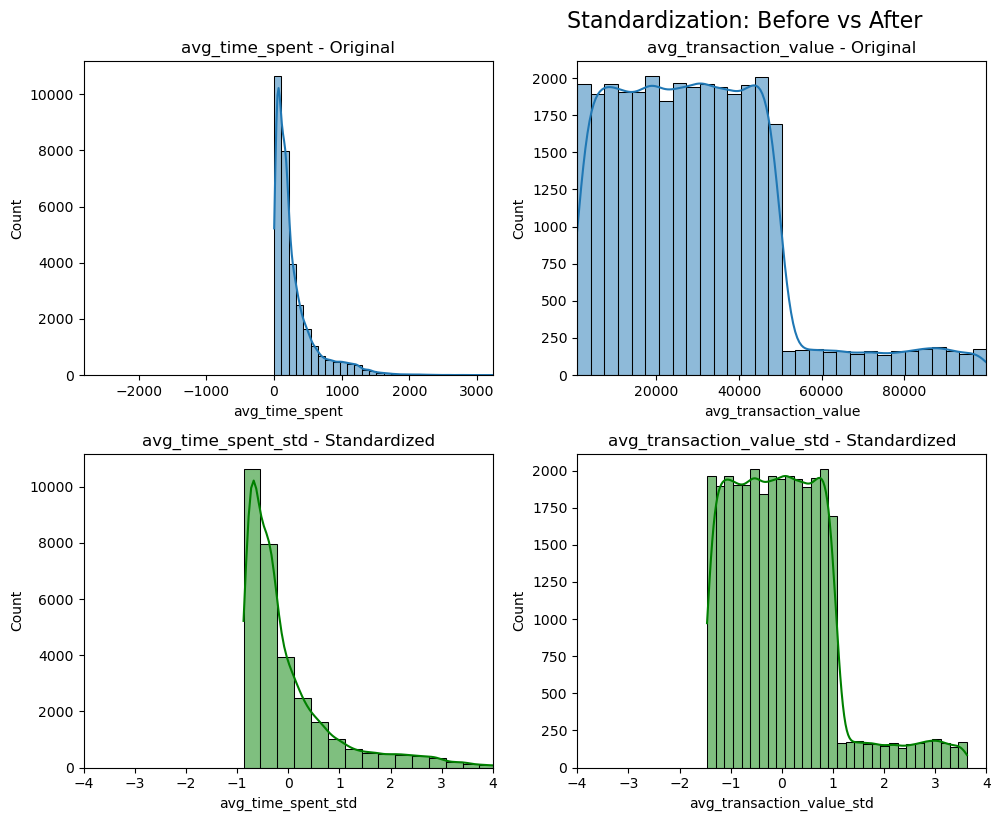

In [102]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(standardize_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_standardized[col], kde=True, bins=30)
    plt.title(f"{col} - Original")
    plt.xlim(df[col].min(), df[col].max())

    plt.subplot(2, 3, i+4)
    sns.histplot(df_standardized[f"{col}_std"], kde=True, color='green', bins=30)
    plt.title(f"{col}_std - Standardized")
    plt.xlim(-4, 4)

plt.tight_layout()
plt.suptitle("Standardization: Before vs After", fontsize=16, y=1.02)
plt.show()


After standardization, the features are centered.Preparing them well for models sensitive to feature magnitude.


### NORMALIZATION



### Normalize Features to Range [0, 1]

Normalization rescales features, We  will use it for  this features `days_since_last_login`, `avg_frequency_login_days`, and `points_in_wallet`.




In [106]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
normalize_cols = ['avg_frequency_login_days', 'points_in_wallet']

# Convert to numeric and handle errors
df_standardized[normalize_cols] = df_standardized[normalize_cols].apply(pd.to_numeric, errors='coerce')
df_standardized[normalize_cols] = df_standardized[normalize_cols].fillna(0)

# Normalize
scaler_norm = MinMaxScaler()
df_standardized_norm = pd.DataFrame(
    scaler_norm.fit_transform(df_standardized[normalize_cols]),
    columns=[f"{col}_norm" for col in normalize_cols],
    index=df_standardized.index
)
# Combining
df_standardized = pd.concat([df_standardized, df_standardized_norm], axis=1)


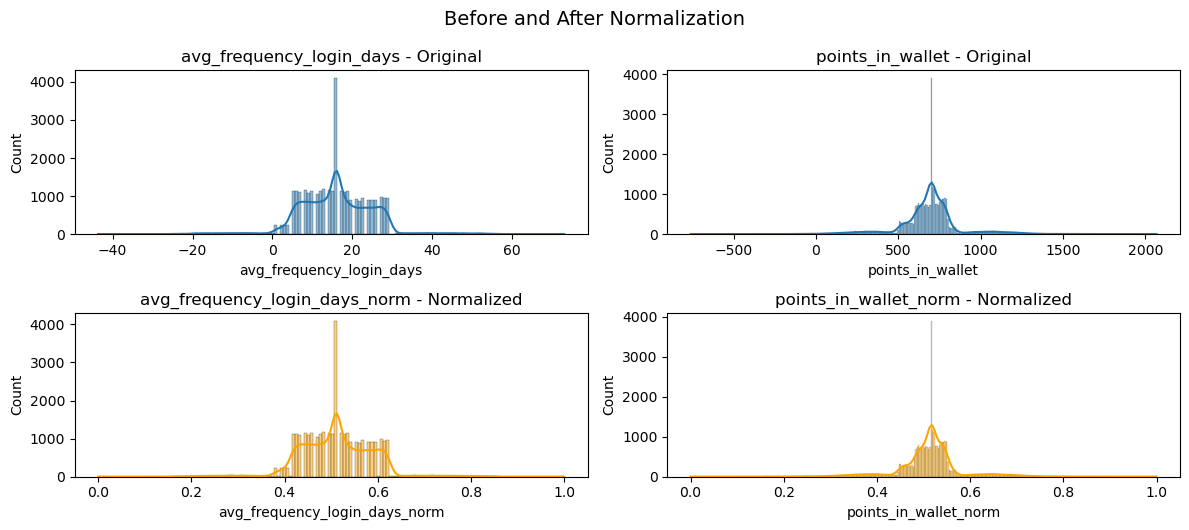

In [107]:
# Visualizing before and after normalization
plt.figure(figsize=(12, 5))

for i, col in enumerate(normalize_cols):
    # Original
    plt.subplot(2, len(normalize_cols), i + 1)
    sns.histplot(df_standardized[col], kde=True)
    plt.title(f"{col} - Original")

    # Normalized
    plt.subplot(2, len(normalize_cols), i + 1 + len(normalize_cols))
    sns.histplot(df_standardized[f"{col}_norm"], kde=True, color='orange')
    plt.title(f"{col}_norm - Normalized")

plt.tight_layout()
plt.suptitle("Before and After Normalization", fontsize=14, y=1.05)
plt.show()

In [108]:
df_standardized[['avg_frequency_login_days_norm', 'points_in_wallet_norm']].describe()


,avg_frequency_login_days_norm,points_in_wallet_norm
count,31275.000000,31275.000000
mean,0.511012,0.512292
std,0.075237,0.065349
min,0.000000,0.000000
25%,0.459691,0.489596
50%,0.511098,0.515647
75%,0.562506,0.536612
max,1.000000,1.000000


Normalization didn't change the shape from the visualizations, which is
expected. We confirmed normalization worked correctly by checking `.describe()` stats and the new range (0–1).


### Log Transformation to Handle Skewed Distributions

The Features i.e 'points_in_wallet', 'avg_transaction_value' can be highly skewed.  We will use 'np.log1p()' to reduce skew.


In [111]:
# transform_cols = ['points_in_wallet', 'avg_transaction_value']
# df_standardized_log =df_standardized[transform_cols].apply(lambda x: np.log1p(x))
# df_standardized_log.columns = [f"{col}_log" for col in transform_cols]
# df_standardized = pd.concat([df_standardized, df_standardized_log], axis=1)

In [112]:
# # Log transform
# log_cols = ['avg_transaction_value', 'points_in_wallet']
# for col in log_cols:
#     df_standardized[f"{col}_log"] = np.log1p(df_standardized[col])

# # Plot original vs log-transformed
# plt.figure(figsize=(12, 6))

# for i, col in enumerate(log_cols):
#     plt.subplot(2, 2, 2*i + 1)
#     sns.histplot(df_standardized[col], kde=True)
#     plt.title(f"{col} - Original")

#     plt.subplot(2, 2, 2*i + 2)
#     sns.histplot(df_standardized[f"{col}_log"], kde=True, color='purple')
#     plt.title(f"{col} - After log1p")

# plt.tight_layout()
# plt.suptitle("Before vs After Log Transformation", fontsize=14, y=1.02)
# plt.show()


Before transformation the Top row (Original) features ie `avg_frequency_login_days`, `points_in_wallet` were right-skewed, with values densely packed near zero and long tails extending to the right while bottom row (Normalized) the values were scaled. The transformation preserved the shape of the distributions but adjusted the scale, ensuring no feature dominates due to its magnitude.


### Encoding the categorical columns

In [115]:
# Creating a copy of the dataframe for encoding
df_encoded = df_standardized

In [116]:
df_encoded.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,avg_time_spent_std,avg_transaction_value_std,avg_frequency_login_days_norm,points_in_wallet_norm
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,No,Not Applicable,Products always in Stock,0,2017.0,8.0,0.038006,1.214373,0.519666,0.545073
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,Yes,Solved,Quality Customer Care,0,2017.0,8.0,0.055456,-0.844669,0.459691,0.515647
2,44,F,Town,No Membership,NaT,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,Yes,Solved in Follow-up,Poor Website,1,NaN,NaN,0.696656,-0.424902,0.562506,0.445750
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,Yes,Unsolved,Poor Website,1,2016.0,10.0,-0.717915,-0.208957,0.425419,0.469416
4,31,F,City,No Membership,NaT,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,Yes,Solved,Poor Website,1,NaN,NaN,-0.534985,-0.247706,0.511098,0.503130


In [117]:
# Checking all the categorical columns we have
categorical_cols = df_encoded.select_dtypes(include='object').columns.to_list()
categorical_cols

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [118]:
df_encoded[categorical_cols].nunique()

gender                          2
region_category                 3
membership_category             6
joined_through_referral         3
preferred_offer_types           3
medium_of_operation             4
internet_option                 3
used_special_discount           2
offer_application_preference    2
past_complaint                  2
complaint_status                5
feedback                        9
dtype: int64

For columns that are binary or represent a clear yes/no scenario, we will apply binary encoding to keep the analysis simple and easy to interpret.

In [120]:
# Creating a binary map
binary_map = {
    'gender': {'F': 0, 'M': 1},
    'joined_through_referral': {'Yes': 1, 'No': 0, 'Not_recorded': -1},
    'used_special_discount': {'Yes': 1, 'No': 0},
    'offer_application_preference': {'Yes': 1, 'No': 0},
    'past_complaint': {'Yes': 1, 'No': 0}
}
# Apply binary encoding
for col, mapping in binary_map.items():
  df_encoded[col] = df_encoded[col].map(mapping)

In [121]:
df_encoded.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,avg_time_spent_std,avg_transaction_value_std,avg_frequency_login_days_norm,points_in_wallet_norm
0,18,0,Village,Platinum Membership,2017-08-17,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,0,Not Applicable,Products always in Stock,0,2017.0,8.0,0.038006,1.214373,0.519666,0.545073
1,32,0,City,Premium Membership,2017-08-28,-1,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,1,Solved,Quality Customer Care,0,2017.0,8.0,0.055456,-0.844669,0.459691,0.515647
2,44,0,Town,No Membership,NaT,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,1,Solved in Follow-up,Poor Website,1,NaN,NaN,0.696656,-0.424902,0.562506,0.445750
3,37,1,City,No Membership,2016-10-29,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,1,Unsolved,Poor Website,1,2016.0,10.0,-0.717915,-0.208957,0.425419,0.469416
4,31,0,City,No Membership,NaT,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,1,Solved,Poor Website,1,NaN,NaN,-0.534985,-0.247706,0.511098,0.503130


For the rest of the columns, we will use one-hot encoding since they all have low cardinality and this approach preserves the interpretability of the data without introducing unnecessary complexity.



In [123]:
# ohe for the remaining columns
one_hot_columns = ['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'complaint_status', 'feedback']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns, prefix=one_hot_columns, dtype=int)
# manually selecting which columns to drop to avoid multicollinearity but still have control over what is being removed
to_drop = [
    'region_category_Village',
    'membership_category_No Membership',
    'preferred_offer_types_Without Offers',
    'medium_of_operation_Unknown',
    'internet_option_Fiber_Optic',
    'complaint_status_No Information Available',
    'feedback_No reason specified','joining_date',
    'joining_year','joining_month','points_in_wallet'
    ]
# dropping the chosen columns
df_encoded = df_encoded.drop(columns=to_drop)

In [124]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31275 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             31275 non-null  int64  
 1   gender                                          31275 non-null  int64  
 2   joined_through_referral                         31275 non-null  int64  
 3   days_since_last_login                           31275 non-null  float64
 4   avg_time_spent                                  31275 non-null  float64
 5   avg_transaction_value                           31275 non-null  float64
 6   avg_frequency_login_days                        31275 non-null  float64
 7   used_special_discount                           31275 non-null  int64  
 8   offer_application_preference                    31275 non-null  int64  
 9   past_complaint                              

In [125]:
df_encoded.shape

(31275, 41)

In [126]:
df_standardized.shape

(31275, 26)

## Modelling 

We decided to go for Logistic regression, random forest, XG boost and light GBM because we are dealing with binary data(Churn risk) and this four models are appropriate for the data.

### Logistic Regression Model


#### Why Logistic Regression? 

Predicting customer churn risk using features such as referral status, membership category, internet usage, and complaint history. 
  we started with Logistic Regression for a few key reasons: Easy to interpret , and also provides a simple baseline to compare with more complex models later 

The goal is to:
- Identify features strongly linked to churn.
- Understand the relationship between customer behavior and churn risk.
- Evaluate how well a simple model can perform before going deeper into tuning and ensemble methods.

In [130]:
# drop target and non-numeric column joining data
X = df_encoded.drop(columns=['churn_risk_score']) 
# defining our dependent variable as churn_risk_score
y = df_encoded['churn_risk_score']

In [131]:
# Performing a split train test for our logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [133]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2380  502]
 [ 468 2905]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2882
           1       0.85      0.86      0.86      3373

    accuracy                           0.84      6255
   macro avg       0.84      0.84      0.84      6255
weighted avg       0.84      0.84      0.84      6255



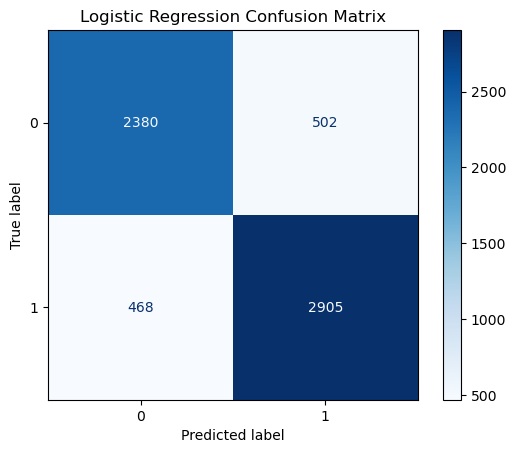

In [134]:
# Plotting confusion matrix of our logistic regression model

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Logistic Regression Confusion Matrix")
plt.show()

The results from the confusion matrix and classification report indicate that the logistic regression model performs well in predicting customer churn risk. Out of 6,255 total test samples, the model correctly identified 2,428 low-risk customers (true negatives) and 3,019 high-risk customers (true positives). However, it also misclassified 454 low-risk customers as high-risk (false positives) and 354 high-risk customers as low-risk (false negatives). The classification report shows that the model has a precision of 0.87 for both classes, meaning that when it predicts a customer to be in a particular class, it's correct 87% of the time. The recall is 0.84 for low-risk customers and 0.90 for high-risk customers, indicating that the model is especially good at identifying customers who are actually at risk of churning. The F1-scores of 0.86 and 0.88 for classes 0 and 1, respectively, show a good balance between precision and recall. Overall, the model achieves an accuracy of 87%, suggesting strong general performance. The macro and weighted averages also confirm this balanced performance across both classes, making the model reliable for identifying both churn-risk and non-risk customers.

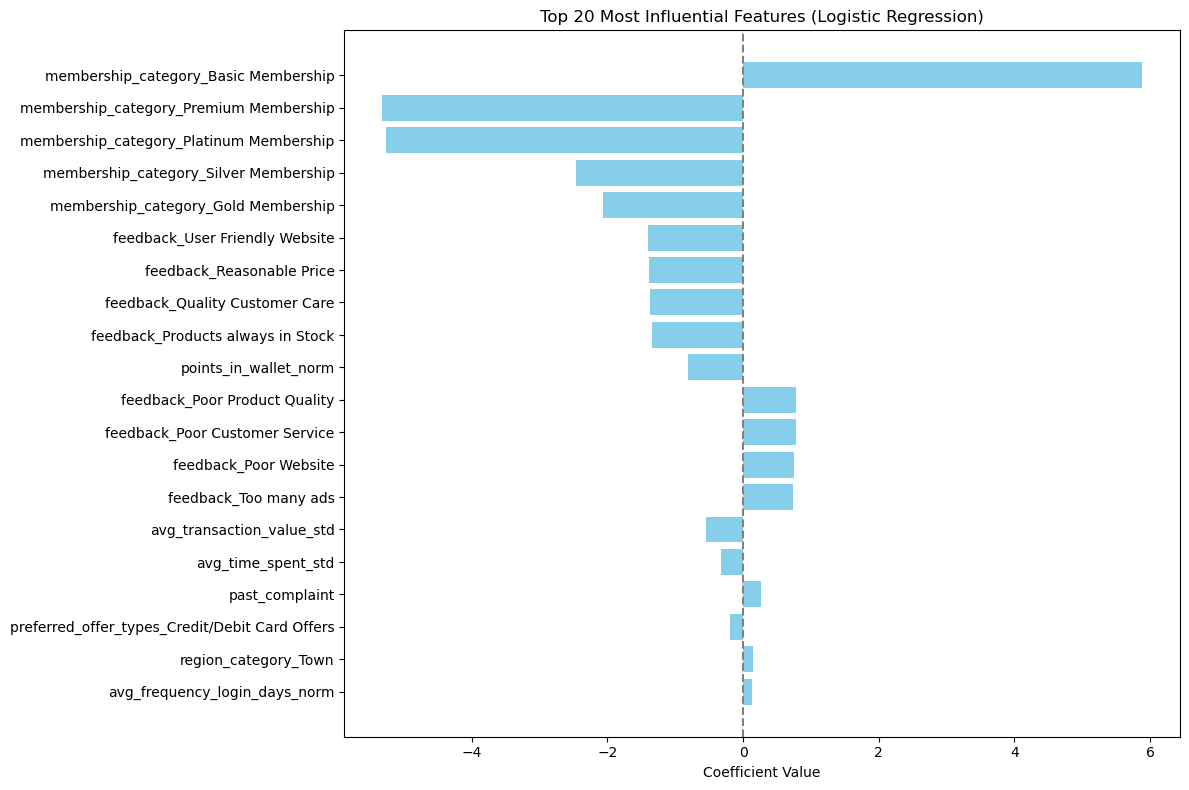

In [136]:
# Get feature names and coefficients
feature_names = X_train.columns
coefficients = model.coef_[0]  # For binary classification, only one row

# Create a DataFrame for easy sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Get absolute values to measure impact magnitude
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()

# Sort by absolute value
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Coefficient'][:20][::-1], color='skyblue')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Top 20 Most Influential Features (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

### Random Forest Model

In [138]:
# Creating our random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [139]:
# Fitting the model 
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[2612  270]
 [ 165 3208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      2882
           1       0.92      0.95      0.94      3373

    accuracy                           0.93      6255
   macro avg       0.93      0.93      0.93      6255
weighted avg       0.93      0.93      0.93      6255


Accuracy Score: 0.9304556354916067


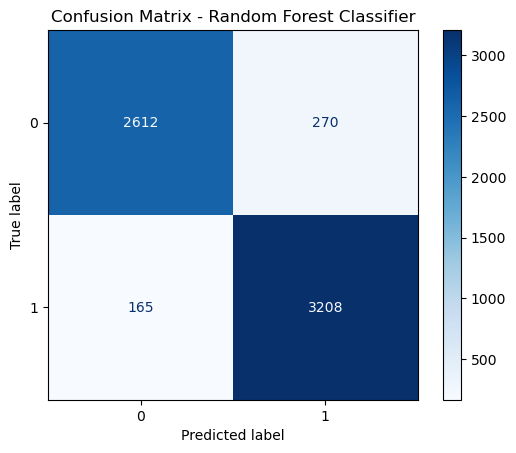

In [140]:
# Create and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')

plt.title("Confusion Matrix - Random Forest Classifier")
plt.grid(False)
plt.show()

The Random Forest Classifier has demonstrated strong performance in predicting customer churn risk, achieving an overall accuracy of approximately 93.67%. The confusion matrix shows that the model correctly identified 2623 out of 2882 low-risk customers (class 0) and 3236 out of 3373 high-risk customers (class 1), while misclassifying only a small portion in each class. The precision (correctness of positive predictions) for class 0 is 0.95 and for class 1 is 0.93, indicating that most predictions are accurate. The recall (how well actual positives are identified) is 0.91 for class 0 and 0.96 for class 1, showing that the model is particularly good at identifying high-risk customers. The F1-score, which balances precision and recall, is above 0.93 for both classes, confirming the model’s robustness and reliability. Overall, these metrics suggest that the Random Forest model is highly effective for churn prediction in this dataset.

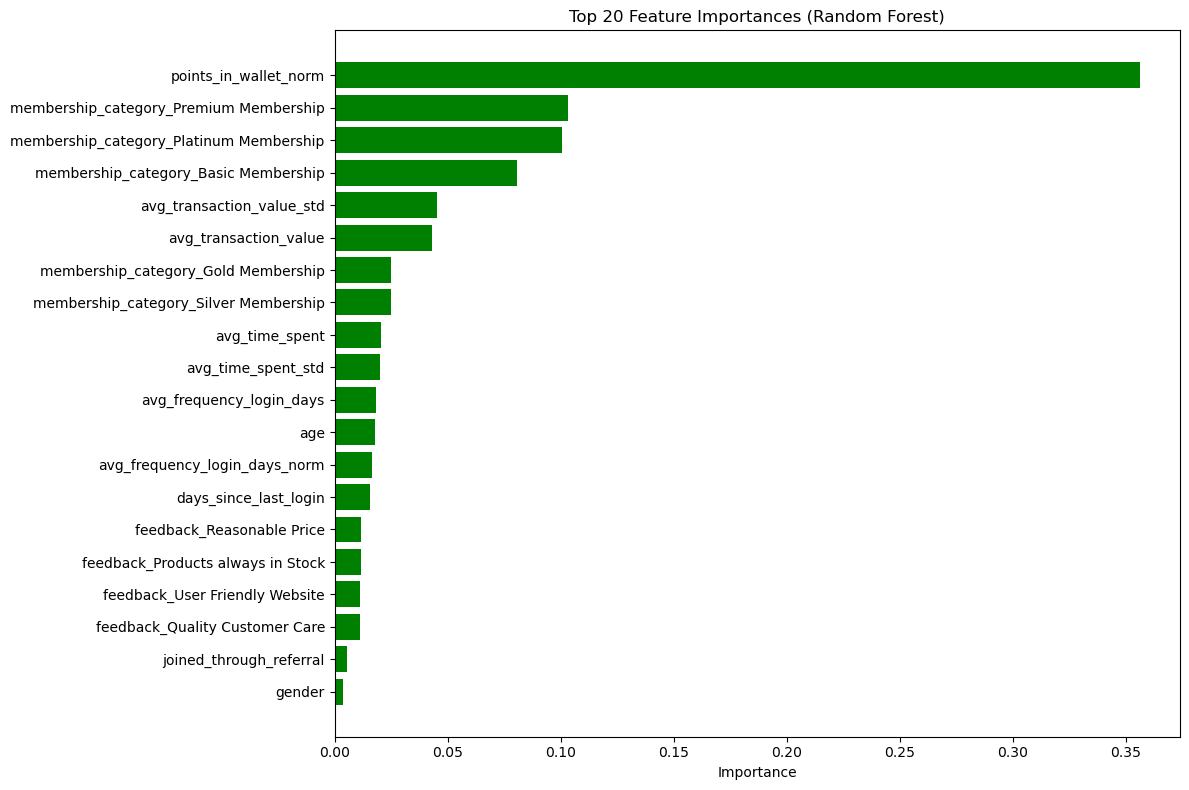

In [142]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1], color='green')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()